Top 3 Cuisines and their percentages:

Primary Cuisine
North Indian    31.356110
Chinese          8.960386
Fast Food        7.042549
Name: count, dtype: float64


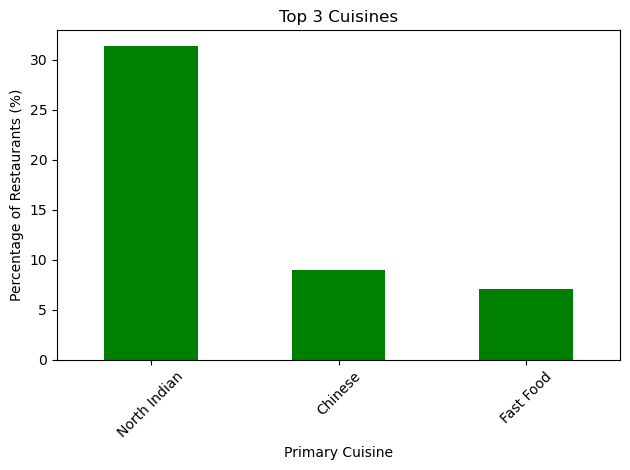

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Data set 1 internship.csv')

# Drop rows with missing cuisines
df = df.dropna(subset=['Cuisines'])

# Count cuisine types (first cuisine if multiple are listed)
df['Primary Cuisine'] = df['Cuisines'].apply(lambda x: x.split(',')[0].strip())

# Top 3 cuisines
top_cuisines = df['Primary Cuisine'].value_counts().head(3)
total_restaurants = len(df)

# Percentages
top_cuisine_percent = (top_cuisines / total_restaurants) * 100

# Display result
print("Top 3 Cuisines and their percentages:\n")
print(top_cuisine_percent)

# Optional bar chart
top_cuisine_percent.plot(kind='bar', color='green')
plt.title("Top 3 Cuisines")
plt.ylabel("Percentage of Restaurants (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



City with the highest number of restaurants: New Delhi (5473 restaurants)

City with the highest average rating: Inner City (4.90 stars)


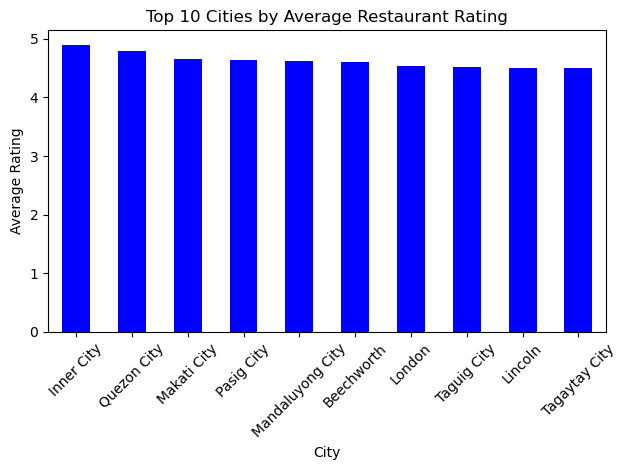

In [5]:
# Drop missing city and rating
df = df.dropna(subset=['City', 'Aggregate rating'])

# 1. City with most restaurants
city_counts = df['City'].value_counts()
top_city = city_counts.idxmax()
print(f"\nCity with the highest number of restaurants: {top_city} ({city_counts.max()} restaurants)")

# 2. Average rating per city
city_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

# 3. City with highest average rating
top_rated_city = city_ratings.idxmax()
print(f"\nCity with the highest average rating: {top_rated_city} ({city_ratings.max():.2f} stars)")

# Optional chart
city_ratings.head(10).plot(kind='bar', color='blue')
plt.title("Top 10 Cities by Average Restaurant Rating")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 10 Cuisine Combinations:

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

Average Ratings for Top Combinations:

Cuisines
North Indian                      1.672329
North Indian, Chinese             2.421722
Chinese                           2.042090
Fast Food                         2.118362
North Indian, Mughlai             2.888623
Cafe                              2.890970
Bakery                            1.924312
North Indian, Mughlai, Chinese    2.568528
Bakery, Desserts                  2.317647
Street Food                       2.161745
Name: Aggregate rating, dtype: float64


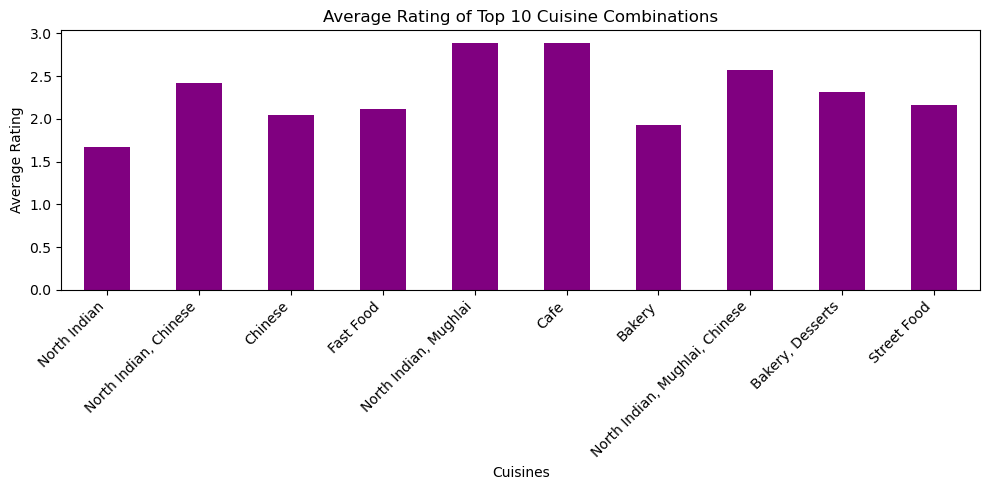

In [9]:
import pandas as pd

# Load dataset
df = pd.read_csv('Data set 1 internship.csv')

# Drop missing values
df = df.dropna(subset=['Cuisines', 'Aggregate rating'])

# Count top cuisine combinations (full string)
top_combinations = df['Cuisines'].value_counts().head(10)
print("Top 10 Cuisine Combinations:\n")
print(top_combinations)

# Calculate average rating for top combinations
combo_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().loc[top_combinations.index]
print("\nAverage Ratings for Top Combinations:\n")
print(combo_ratings)

# Optional: visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
combo_ratings.plot(kind='bar', color='purple')
plt.title("Average Rating of Top 10 Cuisine Combinations")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Data set 1 internship.csv')

# Drop missing values
df = df.dropna(subset=['Votes', 'Aggregate rating'])

# Convert votes to numeric if needed
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# 1. Restaurants with highest and lowest votes
top_votes = df.sort_values('Votes', ascending=False).head(5)
low_votes = df[df['Votes'] > 0].sort_values('Votes').head(5)  # ignoring 0-vote entries

print("🏆 Top 5 Restaurants by Votes:\n")
print(top_votes[['Restaurant Name', 'City', 'Votes', 'Aggregate rating']])

print("\n🥄 Bottom 5 (Non-Zero) Restaurants by Votes:\n")
print(low_votes[['Restaurant Name', 'City', 'Votes', 'Aggregate rating']])


🏆 Top 5 Restaurants by Votes:

                Restaurant Name       City  Votes  Aggregate rating
728                        Toit  Bangalore  10934               4.8
735                    Truffles  Bangalore   9667               4.7
3994           Hauz Khas Social  New Delhi   7931               4.3
2412                  Peter Cat    Kolkata   7574               4.3
739   AB's - Absolute Barbecues  Bangalore   6907               4.6

🥄 Bottom 5 (Non-Zero) Restaurants by Votes:

                Restaurant Name       City  Votes  Aggregate rating
3856  Shudh Vaishno Bhojanalaya  New Delhi      1               0.0
4841               Chicken King  New Delhi      1               0.0
4852           New Anna Ka Dosa  New Delhi      1               0.0
7813        Hyderabad's Delight  New Delhi      1               0.0
7820             Richa's Bakery  New Delhi      1               0.0



📊 Correlation between Votes and Rating: 0.31


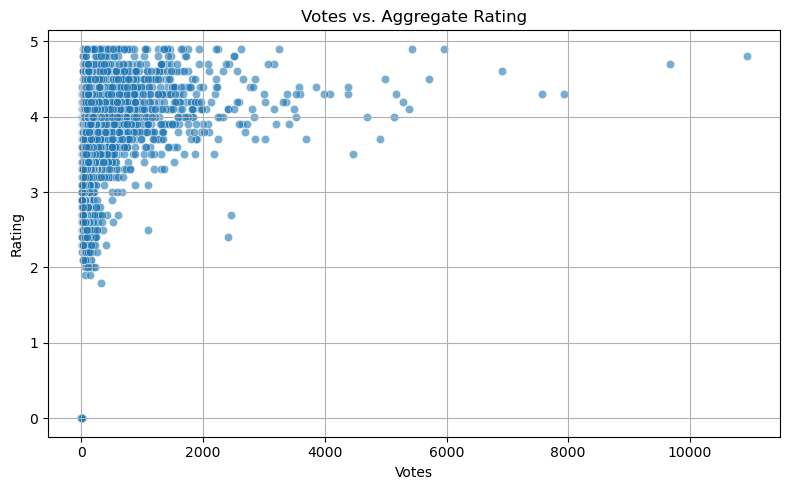

In [12]:
# 2. Correlation between Votes and Rating
correlation = df['Votes'].corr(df['Aggregate rating'])
print(f"\n📊 Correlation between Votes and Rating: {correlation:.2f}")

# Visualize correlation
plt.figure(figsize=(8,5))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, alpha=0.6)
plt.title('Votes vs. Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()
plt.show()
